In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
salary_data = pd.read_csv(r"C:\Users\ASUS\Downloads\Salary_Data.csv")

In [6]:
salary_data.head(5)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [5]:
salary_data.tail(5)

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [7]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [8]:
salary_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [9]:

salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

array([[<AxesSubplot:title={'center':'YearsExperience'}>,
        <AxesSubplot:title={'center':'Salary'}>]], dtype=object)

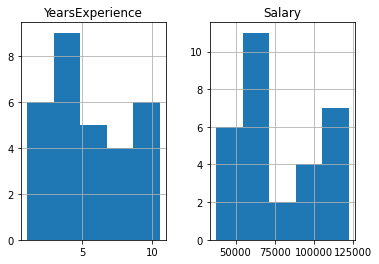

In [10]:
salary_data.hist(bins=5)

In [11]:
salary_data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [12]:
x = salary_data["YearsExperience"].values.reshape(-1,1) 
y = salary_data["Salary"].values.reshape(-1,1) 

In [13]:
print(x)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [14]:
print(y)

[[ 39343]
 [ 46205]
 [ 37731]
 [ 43525]
 [ 39891]
 [ 56642]
 [ 60150]
 [ 54445]
 [ 64445]
 [ 57189]
 [ 63218]
 [ 55794]
 [ 56957]
 [ 57081]
 [ 61111]
 [ 67938]
 [ 66029]
 [ 83088]
 [ 81363]
 [ 93940]
 [ 91738]
 [ 98273]
 [101302]
 [113812]
 [109431]
 [105582]
 [116969]
 [112635]
 [122391]
 [121872]]


In [15]:
x.shape

(30, 1)

In [16]:
y.shape

(30, 1)

Text(0, 0.5, 'Salary')

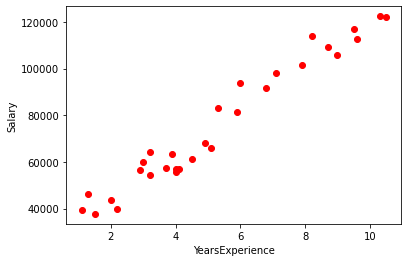

In [17]:
plt.scatter(x,y,color='r') 
plt.xlabel("YearsExperience") 
plt.ylabel("Salary")

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=42)

In [19]:
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

x_train (22, 1)
x_test (8, 1)
y_train (22, 1)
y_test (8, 1)


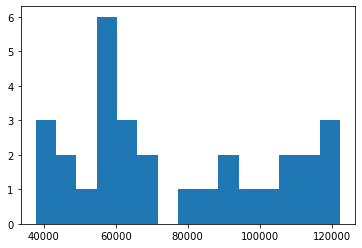

In [20]:
plt.hist(salary_data['Salary'], bins=15)
plt.show()

In [21]:
lowerLimit=salary_data['Salary'].quantile(0.05)
print(lowerLimit)

39589.6


In [22]:
print(salary_data[salary_data['Salary']<lowerLimit])

   YearsExperience  Salary
0              1.1   39343
2              1.5   37731


In [23]:
upperLimit=salary_data['Salary'].quantile(0.95)
print(upperLimit)

119665.64999999998


In [24]:
print(salary_data[salary_data['Salary']>upperLimit])

    YearsExperience  Salary
28             10.3  122391
29             10.5  121872


In [25]:
Salary_Data = salary_data[(salary_data['Salary']>lowerLimit) & (salary_data['Salary']<upperLimit)]
print(Salary_Data)

    YearsExperience  Salary
1               1.3   46205
3               2.0   43525
4               2.2   39891
5               2.9   56642
6               3.0   60150
7               3.2   54445
8               3.2   64445
9               3.7   57189
10              3.9   63218
11              4.0   55794
12              4.0   56957
13              4.1   57081
14              4.5   61111
15              4.9   67938
16              5.1   66029
17              5.3   83088
18              5.9   81363
19              6.0   93940
20              6.8   91738
21              7.1   98273
22              7.9  101302
23              8.2  113812
24              8.7  109431
25              9.0  105582
26              9.5  116969
27              9.6  112635


In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lr = LinearRegression()

In [28]:
model = lr.fit(x_train, y_train)

In [29]:
model.coef_ 

array([[9371.0160797]])

In [30]:
model.intercept_

array([25478.127436])

In [31]:
y_pred=model.predict(x_test)

In [32]:
print(y_pred) 

[[115439.88180109]
 [ 71396.10622651]
 [102320.45928951]
 [ 75144.51265839]
 [ 55465.37889103]
 [ 60150.88693088]
 [121999.59305688]
 [107005.96732936]]


In [33]:
print(y_test)

[[112635]
 [ 67938]
 [113812]
 [ 83088]
 [ 64445]
 [ 57189]
 [122391]
 [109431]]


Text(0, 0.5, 'Salary')

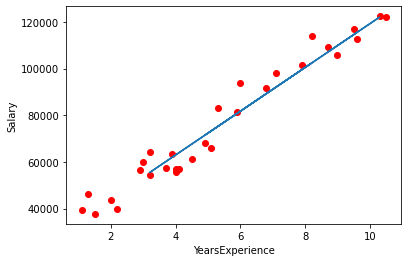

In [34]:
plt.scatter(x,y,color='r')
plt.plot(x_test,y_pred)
plt.xlabel("YearsExperience") 
plt.ylabel("Salary")

In [35]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score 

In [36]:
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 5056.995466663594


In [37]:
print("MSE",mean_squared_error(y_test,y_pred))

MSE 38802588.99247065


In [38]:
from math import sqrt as sqrt
print("RMSE",sqrt(mean_squared_error(y_test,y_pred)))

RMSE 6229.172416338358


In [39]:
r2 = r2_score(y_test, y_pred)
print("r^2(Coefficient of determination,)",r2)

r^2(Coefficient of determination,) 0.9347210011126782


In [40]:
N = len(y_test)
p = 1          
ar2 = 1-((1-r2)*(1-N))/(N-p-1) 
print("Adjusted R2", ar2)


Adjusted R2 1.0761588320352087


In [41]:
model.predict([[11.0]])

array([[128559.30431266]])